In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CHAPTER 2: Forward Pricing

In [2]:
def forward_price_physical_commodity(C, t, r, s, i):
    # C = commodity price
    # t = time to maturity / 12 months
    # r = interest rate
    # s = annual storage costs per commodity unit
    # i = annual insurance costs per commodity unit
    return C * (1+r*t) + (s*t) + (i*t)

def convenience_yield(F, t, r, s, i):
    # F = forward price
    # t = time to maturity / 12 months
    # r = interest rate
    # s = annual storage costs per commodity unit
    # i = annual insurance costs per commodity unit
    return (F-(s+i)*t) / (1+r*t)

def forward_price_stock_interest_on_dividends(S, t, r, d_i, t_i, r_i):
    # S = stock price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # d_i = each dividend payment expected prior to maturity of the forward contract
    # t_i = time remaining to maturity after each dividend payment
    # r_i = the applicable interest rate (the forward rate) from each dividend payment to maturity of the forward contract
    return S + (S*r*t) - np.sum(d_i * (1 + r_i + t_i))

def forward_price_stock_no_interest_on_dividends(S, t, r, D):
    # S = stock price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # D = dividend payments aggregated
    return S + (S*r*t) - np.sum(D)

def forward_price_bond_or_note_interest_on_dividends(B, t, r, c_i, t_i, r_i):
    # B = bond price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # c_i = each coupon payment expected prior to maturity of the forward contract
    # t_i = time remaining to maturity after each coupon payment
    # r_i = the applicable interest rate (the forward rate) from each coupon payment to maturity of the forward contract
    return (B * (1+r*t)) - np.sum(c_i * (1 + r_i * t_i))

def forward_price_foreign_currency(C_d, C_f, r_d, r_f, t):
    # C_d = domestic currency price
    # C_f = foreign currency price
    # r_d = domestic currency interest rate
    # r_f = foreign currency interest rate
    # t = time to maturity / 12 months
    return (C_d/C_f) * ( (1+r_d*t) / (1+r_f*t) )

def implied_spot_price_stock_or_future_option(F, D, r, t):
    # F = forward price
    # D = dividend payments aggregated
    # r = interest rate
    # t = time to maturity / 12 months
    return (F + np.sum(D)) / (1+r*t)

def implied_interest_rate_stock_or_future_option(F, D, S, t):
    # F = forward price
    # D = dividend payments aggregated
    # S = stock spot price
    # t = time to maturity / 12 months
    return (((F + np.sum(D)) / S) - 1) / t

def implied_dividend_stock_or_future_option(S, r, t, F):
    # S = stock spot price
    # r = interest rate
    # t = time to maturity / 12 months
    # F = forward price
    return  (S * (1+r*t) ) - F

In [23]:
convenience_yield(77.40,3/12,0.08,3.00,0.60)

75.0

In [14]:
forward_price_stock_interest_on_dividends(67.00, 8/12, 0.06, 0.33, np.array([7/12, 1/12]), np.array([0.062, 0.065]))

68.75809000000001

In [17]:
forward_price_stock_no_interest_on_dividends(67.00, 8/12, 0.06, np.array([0.33, 0.33]))

69.02000000000001

In [21]:
forward_price_bond_or_note_interest_on_dividends(109.76, 10/12, 0.08, 5.25, np.array([8/12, 2/12]), np.array([0.082, 0.085]))

106.21595833333335

In [25]:
forward_price_foreign_currency(1.50, 1.00, 0.06, 0.04, 6/12)

1.5147058823529411

In [13]:
implied_interest_rate_stock_or_future_option(69.50, np.array([0.66]), 67.00, 8/12)

0.07075

In [14]:
implied_dividend_stock_or_future_option(67.00, 0.06, 8/12, 69.50)

0.18

# CHAPTER 3: Expiration Profit and Loss

In [4]:
def intrinsic_values_call_options(spot_prices, strike_price):
    """
    Calculate the intrinsic values of a call option for a series of spot prices using optimized numpy operations.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.

    Returns:
    np.array: Array of intrinsic values for each spot price.
    """
    # Calculate the difference between spot prices and strike price
    intrinsic_values = spot_prices - strike_price

    # Use numpy's maximum function to apply the max(0, S - X) operation across the array
    return np.maximum(intrinsic_values, 0)

def intrinsic_values_put_options(spot_prices, strike_price):
    """
    Calculate the intrinsic values of a put option for a series of spot prices using optimized numpy operations.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.

    Returns:
    np.array: Array of intrinsic values for each spot price.
    """
    # Calculate the difference between strike price and spot prices
    intrinsic_values = strike_price - spot_prices

    # Use numpy's maximum function to apply the max(0, X - S) operation across the array
    return np.maximum(intrinsic_values, 0)

In [21]:
intrinsic_values_call_options(np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125]), 95)

array([ 0,  0,  0,  0,  5, 10, 15, 20, 25, 30])

In [22]:
intrinsic_values_put_options(np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125]), 110)

array([30, 25, 20, 15, 10,  5,  0,  0,  0,  0])

## Figure 4-1 Plot Parity Graph for  Long Call

In [21]:
def plot_long_call_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a call option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values using the optimized function
    intrinsic_values = intrinsic_values_call_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Intrinsic Value")

    # Plot the red dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the red line below the strike price (option has no value)
    plt.plot([min(spot_prices), strike_price], [0, 0], color="magenta", linewidth=2)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices >= strike_price, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Call Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

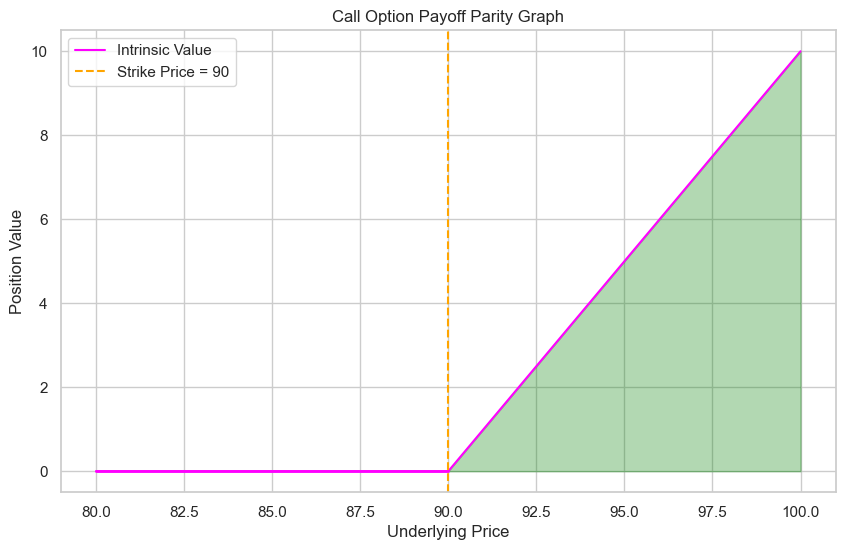

In [22]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_long_call_option_parity(spot_prices, strike_price)


## Figure 4-2 Plot Parity Graph for Short Call

In [30]:
def plot_short_call_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a short call option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values using the optimized function for short call
    intrinsic_values = -intrinsic_values_call_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the short call
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Short Call)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the magenta line below the strike price (option has no value)
    plt.plot([min(spot_prices), strike_price], [0, 0], color="magenta", linewidth=2)

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices >= strike_price, color="red", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Call Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

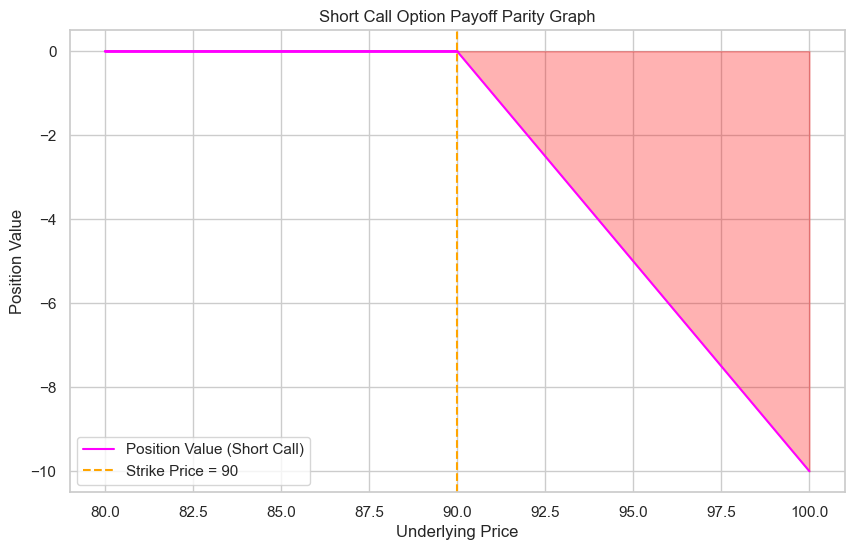

In [31]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_short_call_option_parity(spot_prices, strike_price)

## Figure 4-3 Plot Parity Graph for Long Put

In [34]:
def plot_long_put_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a long put option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the long put option
    intrinsic_values = intrinsic_values_put_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the long put
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Long Put)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the blue line above the strike price (option has no value)
    plt.plot([strike_price, max(spot_prices)], [0, 0], color="magenta", linewidth=2)

    # Highlight the positive payoff region below the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices <= strike_price, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Long Put Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

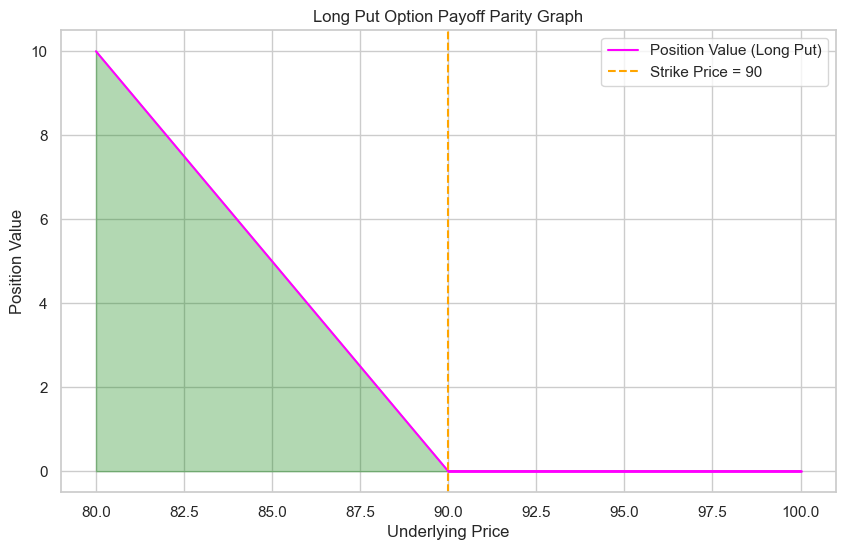

In [35]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_long_put_option_parity(spot_prices, strike_price)

## Figure 4-4 Plot Parity Graph for Short Put

In [36]:
def plot_short_put_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a short put option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the short put option
    intrinsic_values = -intrinsic_values_put_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the short put
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Short Put)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the magenta line above the strike price (option has no value)
    plt.plot([strike_price, max(spot_prices)], [0, 0], color="magenta", linewidth=2)

    # Highlight the negative payoff region below the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices <= strike_price, color="red", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Put Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

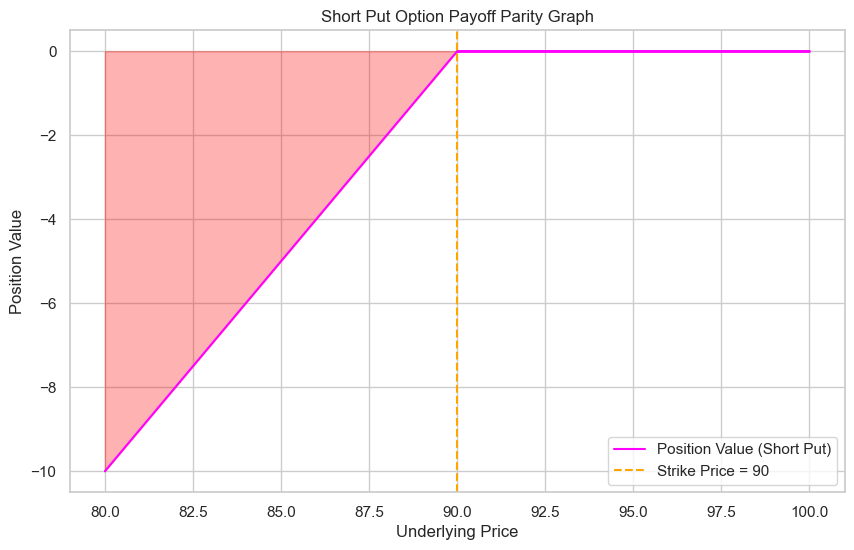

In [37]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_short_put_option_parity(spot_prices, strike_price)